In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# Carregar os dados
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target # Apenas para comparação futura
# Exibir informações básicas
print(X.head())
print("Número de amostras:", X.shape[0])
print("Número de características:", X.shape[1])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Número de amostras: 150
Número de características: 4


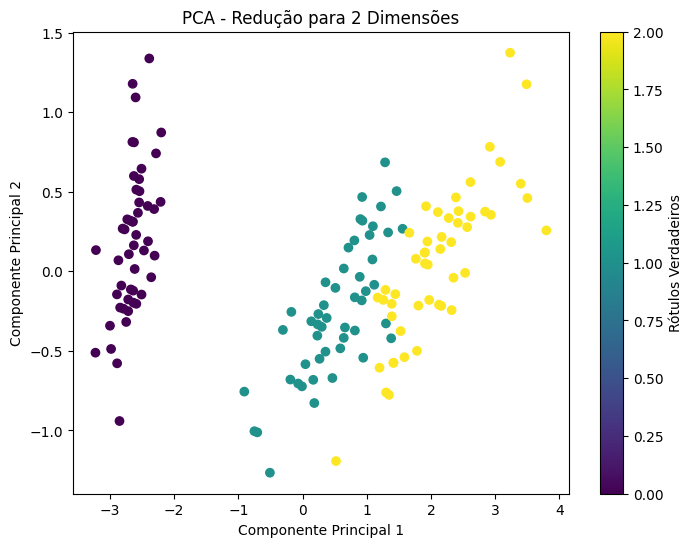

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduza os dados para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotando os dados em um gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Rótulos Verdadeiros')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Redução para 2 Dimensões')
plt.show()

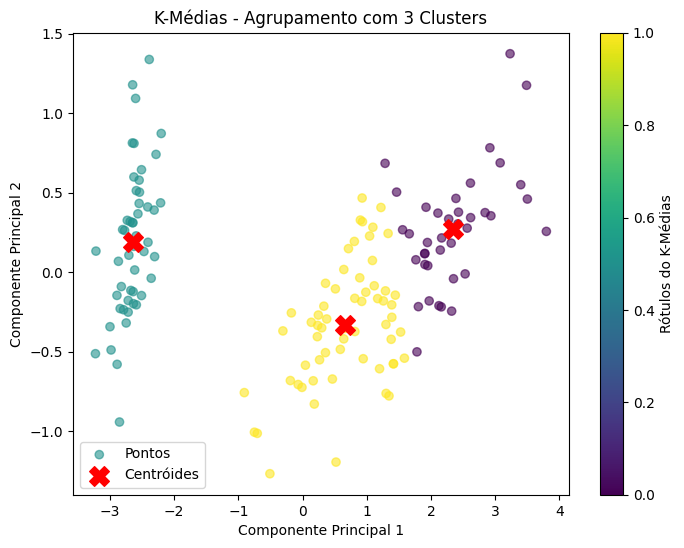

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Inicialize o modelo
kmeans = KMeans(n_clusters=3, random_state=42)

# Treine o modelo nos dados reduzidos (X_pca)
kmeans.fit(X_pca)

# Atribua os rótulos aos dados
kmeans_labels = kmeans.labels_

# Obtenha os centróides
centroids = kmeans.cluster_centers_

# Plotando os dados coloridos pelos grupos formados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6, label='Pontos')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centróides')
plt.colorbar(label='Rótulos do K-Médias')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-Médias - Agrupamento com 3 Clusters')
plt.legend()
plt.show()


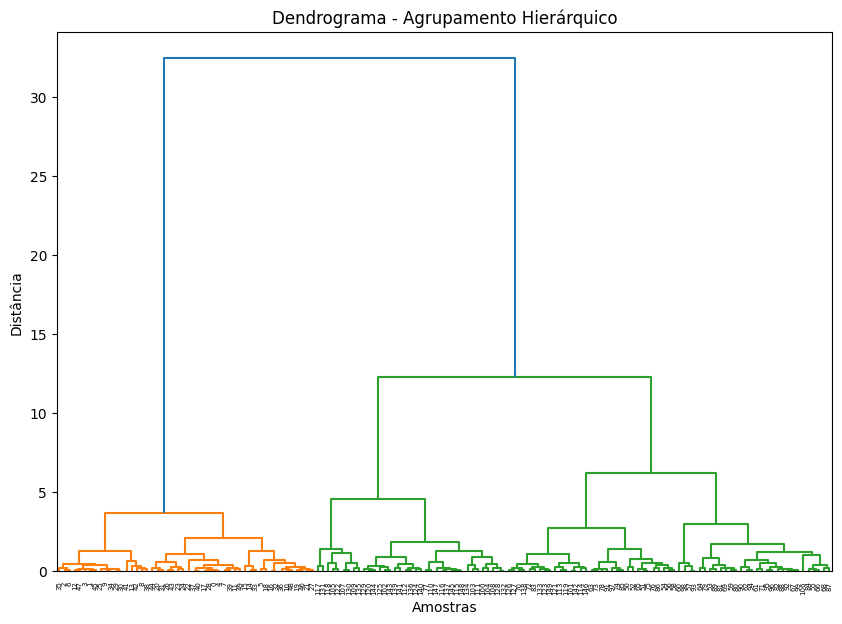

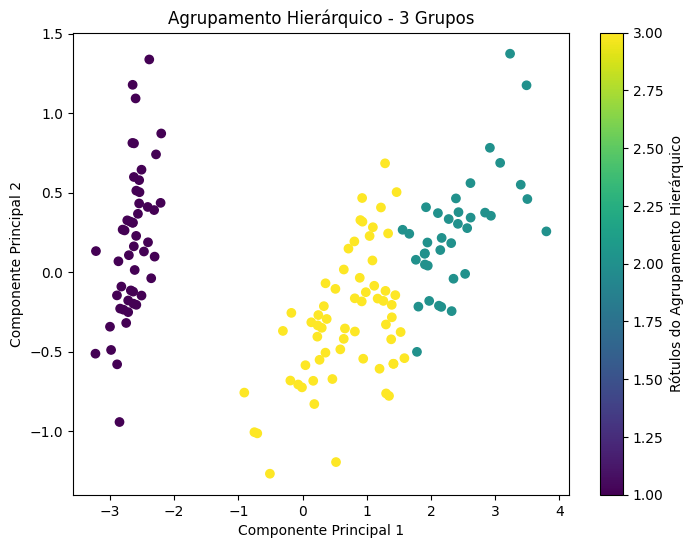

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Crie a matriz de ligação
linkage_matrix = linkage(X_pca, method='ward')

# Gere o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrograma - Agrupamento Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

# Divida os dados em 3 grupos e plote os dados coloridos pelos grupos
from scipy.cluster.hierarchy import fcluster

hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Plotando os dados coloridos pelos grupos formados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.colorbar(label='Rótulos do Agrupamento Hierárquico')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupamento Hierárquico - 3 Grupos')
plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calcule o ARI para K-Médias
ari_kmeans = adjusted_rand_score(y, kmeans_labels)

# Calcule o ARI para Agrupamento Hierárquico
ari_hierarchical = adjusted_rand_score(y, hierarchical_labels)

# Exibir os valores de ARI
print(f'ARI K-Médias: {ari_kmeans}')
print(f'ARI Agrupamento Hierárquico: {ari_hierarchical}')


ARI K-Médias: 0.7163421126838476
ARI Agrupamento Hierárquico: 0.7445264308738749
